In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## PCA

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
x = iris.data
y = iris.target

In [5]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2) ##壓到2維

## 訓練

In [9]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## 預測

In [10]:
x[87]

array([6.3, 2.3, 4.4, 1.3])

In [11]:
X = pca.transform(x)

In [12]:
X[87]

array([ 0.81509524, -0.37203706])

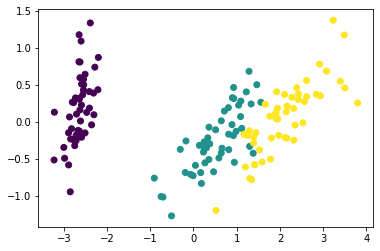

In [13]:
plt.scatter(X[:,0],X[:,1],c=y)

### 訓練/測試資料

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train ,x_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2,
                                                   random_state = 0)

In [16]:
from sklearn.svm import SVC

In [17]:
svc = SVC(gamma = 'auto')

In [18]:
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
xr =np.arange(-4,4.2,0.02)
yr =np.arange(-1.5,1.5,0.02)

x1,y1 = np.meshgrid(xr,yr)
P = np.c_[x1.ravel(),y1.ravel()]

z=svc.predict(P)
Z = z.reshape(x1.shape)

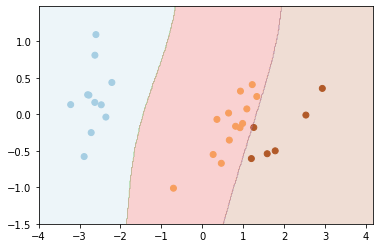

In [25]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap='Paired')
plt.contourf(x1,y1,Z,alpha=0.2,cmap='Paired')

## K MEANS

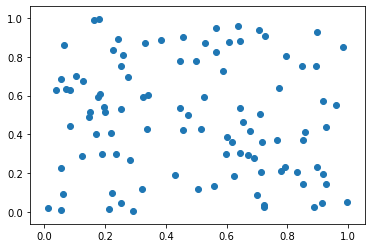

In [26]:
x=np.random.rand(100,2)
plt.scatter(x[:,0],x[:,1])

In [27]:
from sklearn.cluster import KMeans

In [28]:
clf = KMeans(n_clusters=3) #分三類

In [29]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
clf.predict(x)

array([1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 2,
       0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 2, 1,
       2, 1, 0, 0, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0,
       1, 0, 2, 2, 1, 2, 1, 2, 0, 2, 1, 0, 0, 0, 2, 2, 0, 1, 2, 2, 0, 0,
       0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1])

In [30]:
xr =np.arange(0,1,0.02)
yr =np.arange(0,1,0.02)

x1,y1 = np.meshgrid(xr,yr)
P = np.c_[x1.ravel(),y1.ravel()]

z= clf.predict(P)
Z = z.reshape(x1.shape)

In [33]:
clf.labels_

array([1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 2,
       0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 2, 1,
       2, 1, 0, 0, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0,
       1, 0, 2, 2, 1, 2, 1, 2, 0, 2, 1, 0, 0, 0, 2, 2, 0, 1, 2, 2, 0, 0,
       0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1])

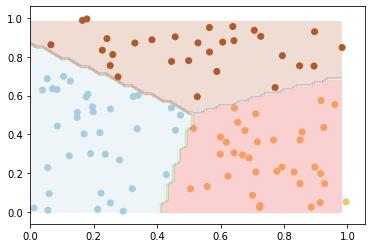

In [34]:
plt.scatter(x[:,0],x[:,1],c=clf.labels_,cmap='Paired')
plt.contourf(x1,y1,Z,alpha=0.2,cmap='Paired')

In [36]:
from sklearn.datasets.samples_generator import make_blobs

In [61]:
x, y =make_blobs(n_samples=500, centers=3, n_features=2 ,random_state =0)

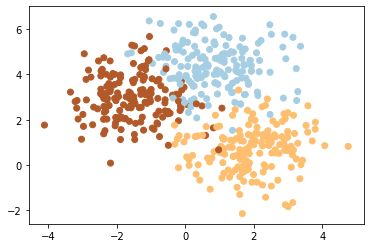

In [40]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='Paired')

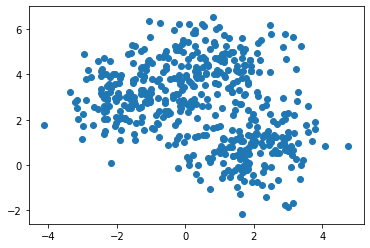

In [64]:
plt.scatter(x[:,0],x[:,1])

In [42]:
clf = KMeans(n_clusters=3)

In [43]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
xr =np.arange(-5,5,0.02)
yr =np.arange(-3,7,0.02)

x1,y1 = np.meshgrid(xr,yr)
P = np.c_[x1.ravel(),y1.ravel()]

z= clf.predict(P)
Z = z.reshape(x1.shape)

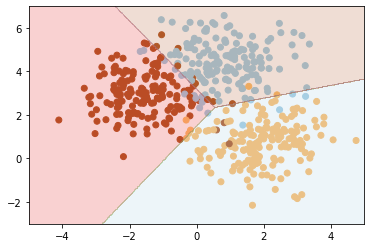

In [45]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='Paired')
plt.contourf(x1,y1,Z,alpha=0.2,cmap='Paired')

## Mean shift

In [49]:
from sklearn.cluster import MeanShift

In [50]:
clf = MeanShift()

### 訓練

In [51]:
clf.fit(x)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

### 預測

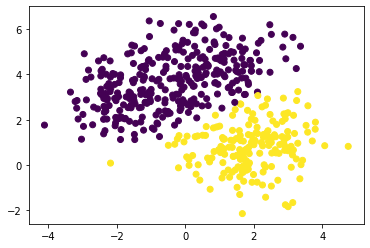

In [54]:
plt.scatter(x[:,0],x[:,1],c=clf.labels_)

In [55]:
xr =np.arange(-5,5,0.02)
yr =np.arange(-3,7,0.02)

x1,y1 = np.meshgrid(xr,yr)
P = np.c_[x1.ravel(),y1.ravel()]

z= clf.predict(P)
Z = z.reshape(x1.shape)

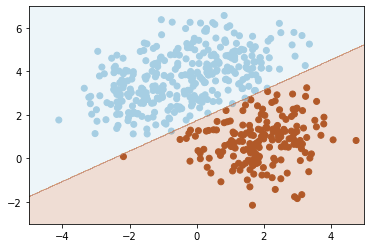

In [59]:
plt.scatter(x[:,0],x[:,1],c=clf.labels_,cmap='Paired')
plt.contourf(x1,y1,Z,alpha=0.2,cmap='Paired')

## cross_val_score

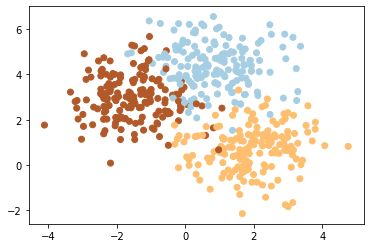

In [65]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='Paired')

In [66]:
from sklearn.model_selection import cross_val_score

## SVC

In [67]:
clf = SVC(gamma='auto')
scores = cross_val_score(clf, x, y,cv=5)

In [68]:
scores

array([0.94117647, 0.94059406, 0.98989899, 0.90909091, 0.92929293])

In [70]:
scores.mean()

0.9420106716554008

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
clf = DecisionTreeClassifier()

In [73]:
scores = cross_val_score(clf, x, y,cv=5)

In [74]:
scores

array([0.92156863, 0.88118812, 0.95959596, 0.90909091, 0.88888889])

In [76]:
scores.mean()

0.9120665007677239

## random forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
clf = RandomForestClassifier(n_estimators=100)

In [80]:
scores = cross_val_score(clf, x, y,cv=5)

In [81]:
scores

array([0.91176471, 0.9009901 , 0.96969697, 0.88888889, 0.88888889])

In [82]:
scores.mean()

0.9120459104734003